# IMPORT LIB

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error

# LOAD DATASET

In [2]:
df=pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
print(df.shape)
df.head()
#(442, 11)

(442, 11)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


# Describe()

In [3]:
pd.options.display.float_format = '{:,.1f}'.format
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0
mean,48.5,1.5,26.4,94.6,189.1,115.4,49.8,4.1,4.6,91.3,152.1
std,13.1,0.5,4.4,13.8,34.6,30.4,12.9,1.3,0.5,11.5,77.1
min,19.0,1.0,18.0,62.0,97.0,41.6,22.0,2.0,3.3,58.0,25.0
25%,38.2,1.0,23.2,84.0,164.2,96.0,40.2,3.0,4.3,83.2,87.0
50%,50.0,1.0,25.7,93.0,186.0,113.0,48.0,4.0,4.6,91.0,140.5
75%,59.0,2.0,29.3,105.0,209.8,134.5,57.8,5.0,5.0,98.0,211.5
max,79.0,2.0,42.2,133.0,301.0,242.4,99.0,9.1,6.1,124.0,346.0


# SPLIT DATASET

In [4]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Y'],test_size=0.2,random_state=42)
print("Train shape",X_train.shape, "Test shape", X_test.shape)

sc_x=StandardScaler()
X_train_sc=sc_x.fit_transform(X_train)

# Apply the scaling to test data sets
X_test_sc=sc_x.transform(X_test)

#Train shape (353, 10) Test shape (89, 10)

Train shape (353, 10) Test shape (89, 10)


# OLS - scikit-learn

## Fit, Predict and evaluate

In [5]:
#Fit the models
reg_ols=LinearRegression()
reg_ols.fit(X_train_sc,y_train)

#Coefficients
intercept=reg_ols.intercept_
coef_ols=[round(coef,2) for coef in reg_ols.coef_]
print("Intercept", round(intercept,2))
print( "Coefs", coef_ols)

#Predict values
y_train_predict=reg_ols.predict(X_train_sc)
y_test_predict=reg_ols.predict(X_test_sc)

#Evaluate with R2 score (Coefficient of determination)
r2_train=r2_score(y_train, y_train_predict)
r2_test=r2_score(y_test, y_test_predict)

print("TRAIN-model direct score R2: %.5f"%reg_ols.score(X_train_sc,y_train))
print("TRAIN-recomputed         R2: %.5f" % r2_train)
print("TEST                     R2: %.3f" % r2_test)


Intercept 153.74
Coefs [1.75, -11.51, 25.61, 16.83, -44.45, 24.64, 7.68, 13.14, 35.16, 2.35]
TRAIN-model direct score R2: 0.52792
TRAIN-recomputed         R2: 0.52792
TEST                     R2: 0.453


## Visualization

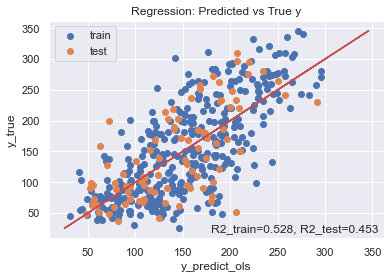

In [6]:
plt.scatter(y_train_predict,y_train,label='train')
plt.scatter(y_test_predict,y_test,label='test')
plt.plot(y_train,y_train,'-r')
plt.annotate(r"R2_train={0}, R2_test={1}".format(round(r2_train,3),round(r2_test,3)), xy=(180, 20),xytext=(0, 0), textcoords='offset points',
             fontsize=12)
plt.xlabel("y_predict_ols")
plt.ylabel("y_true")
plt.title("Regression: Predicted vs True y")
plt.legend()

# OLS StatsModels

## Fit the model, Evaluate (results in the summary)

In [7]:
X_train_sc_cst=sm.add_constant(X_train_sc)
sm_ols=sm.OLS(y_train,X_train_sc_cst).fit()
print("TRAIN: R2: %.5f"%sm_ols.rsquared)
sm_ols.summary()

TRAIN: R2: 0.52792


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           5.41e-50
Time:                        19:34:41   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7365      2.896     53.083      0.000     148.040     159.433
x1             1.7538      3.195      0.549      0.583      -4.531       8.038
x2           -11.5118      3.262     -3.529      0.000     -17.929      -5.095
x3            25.6071      3.633      7.049      0.000      18.461      32.753
x4            16.8289      3.454      4.873      0.000      10.036      23.622
x5           -44.4489     21.527     -2.065      0.040     -86.792      -2.106
x6            24.6410     17.319      1.423      0.156      -9.423      58.705
x7             7.6770     10.946      0.701      0.484     -13.854      29.208
x8            13.1388      8.848      1.485      0.138      -4.264      30.542
x9            35.1612      9.191      3.826      0.000      17.083      53.239
x10            2.3514      3.548      0.663      0.508      -4.627       9.330
==============================================================================
Omnibus:                        1.457   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                1.412
Skew:                           0.064   Prob(JB):                        0.494
Kurtosis:                       2.718   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict and evaluate

In [8]:
X_test_sc_cst=sm.add_constant(X_test_sc)
y_test_pred=sm_ols.predict(X_test_sc_cst)
r2_test=r2_score(y_test, y_test_pred)
print("TEST R2: %.3f" % r2_test)

TEST R2: 0.453


## Visualization

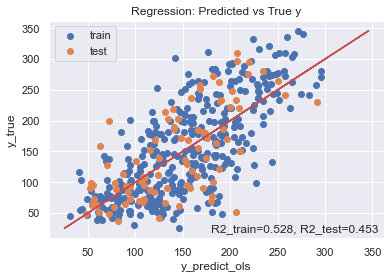

In [9]:
y_train_predict=sm_ols.predict(X_train_sc_cst)

plt.scatter(y_train_predict,y_train,label='train')
plt.scatter(y_test_pred,y_test,label='test')
plt.plot(y_train,y_train,'-r')
plt.annotate(r"R2_train={0}, R2_test={1}".format(round(r2_train,3),round(r2_test,3)), xy=(180, 20),xytext=(0, 0), textcoords='offset points',
             fontsize=12)
plt.xlabel("y_predict_ols")
plt.ylabel("y_true")
plt.title("Regression: Predicted vs True y")
plt.legend()

## Refit the model

In [10]:
#Initial features in our dataset
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [11]:
def split_data(df,cols):
    X_train,X_test,y_train,y_test=train_test_split(df[cols],df['Y'],test_size=0.2,random_state=42)
    print("Train shape",X_train.shape, "Test shape", X_test.shape)

    sc_x=StandardScaler()
    X_train_sc=sc_x.fit_transform(X_train)

    # Apply the scaling to test data sets
    X_test_sc=sc_x.transform(X_test)
    return X_train_sc,X_test_sc,y_train,y_test

In [12]:
## intial columns
cols=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
# remove AGE as the pvalue =0.583
cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
X_train_sc,X_test_sc,y_train,y_test=split_data(df,cols)
X_new=X_train_sc[:,1:]
X_train_sc_cst=sm.add_constant(X_train_sc)
sm_ols=sm.OLS(y_train,X_train_sc_cst).fit()
print("TRAIN: R2: %.5f"%sm_ols.rsquared)
sm_ols.summary()

Train shape (353, 9) Test shape (89, 9)
TRAIN: R2: 0.52750


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     42.55
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           9.31e-51
Time:                        19:34:42   Log-Likelihood:                -1906.3
No. Observations:                 353   AIC:                             3833.
Df Residuals:                     343   BIC:                             3871.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7365      2.893     53.138      0.000     148.046     159.427
x1           -11.2590      3.226     -3.490      0.001     -17.605      -4.913
x2            25.6246      3.629      7.061      0.000      18.487      32.763
x3            17.1438      3.402      5.039      0.000      10.452      23.836
x4           -44.6808     21.501     -2.078      0.038     -86.972      -2.390
x5            25.1515     17.276      1.456      0.146      -8.829      59.132
x6             7.8828     10.929      0.721      0.471     -13.613      29.379
x7            12.9039      8.828      1.462      0.145      -4.461      30.268
x8            35.5552      9.153      3.884      0.000      17.551      53.559
x9             2.5775      3.520      0.732      0.465      -4.346       9.501
==============================================================================
Omnibus:                        1.373   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.336
Skew:                           0.056   Prob(JB):                        0.513
Kurtosis:                       2.720   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
## intial columns
# cols=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
## After removing age
# cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
# remove S3 as the pvalue =0.471
cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S4', 'S5', 'S6']
X_train_sc,X_test_sc,y_train,y_test=split_data(df,cols)
X_new=X_train_sc[:,1:]
X_train_sc_cst=sm.add_constant(X_train_sc)
sm_ols=sm.OLS(y_train,X_train_sc_cst).fit()
print("TRAIN: R2: %.5f"%sm_ols.rsquared)
sm_ols.summary()

Train shape (353, 8) Test shape (89, 8)
TRAIN: R2: 0.52679


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     47.87
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.68e-51
Time:                        19:34:42   Log-Likelihood:                -1906.5
No. Observations:                 353   AIC:                             3831.
Df Residuals:                     344   BIC:                             3866.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7365      2.891     53.175      0.000     148.050     159.423
x1           -11.3370      3.222     -3.518      0.000     -17.675      -4.999
x2            25.6665      3.626      7.078      0.000      18.534      32.799
x3            17.0643      3.398      5.022      0.000      10.381      23.748
x4           -31.3262     10.924     -2.868      0.004     -52.813      -9.840
x5            15.9568     11.652      1.369      0.172      -6.961      38.875
x6             8.5929      6.493      1.323      0.187      -4.178      21.364
x7            31.0169      6.644      4.669      0.000      17.950      44.084
x8             2.6438      3.517      0.752      0.453      -4.273       9.560
==============================================================================
Omnibus:                        1.461   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.410
Skew:                           0.062   Prob(JB):                        0.494
Kurtosis:                       2.716   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
## intial columns
# cols=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
## After removing AGE
# cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
## After removing S3
# cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S4', 'S5', 'S6']
## remove S6 as the pvalue =0.453
cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S4', 'S5']
X_train_sc,X_test_sc,y_train,y_test=split_data(df,cols)
X_new=X_train_sc[:,1:]
X_train_sc_cst=sm.add_constant(X_train_sc)
sm_ols=sm.OLS(y_train,X_train_sc_cst).fit()
print("TRAIN: R2: %.5f"%sm_ols.rsquared)
sm_ols.summary()

Train shape (353, 7) Test shape (89, 7)
TRAIN: R2: 0.52601


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     54.69
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.88e-52
Time:                        19:34:42   Log-Likelihood:                -1906.8
No. Observations:                 353   AIC:                             3830.
Df Residuals:                     345   BIC:                             3861.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7365      2.889     53.208      0.000     148.054     159.419
x1           -11.1978      3.215     -3.483      0.001     -17.521      -4.875
x2            26.0527      3.587      7.262      0.000      18.997      33.108
x3            17.5380      3.337      5.256      0.000      10.975      24.101
x4           -31.5246     10.914     -2.888      0.004     -52.991     -10.058
x5            16.3309     11.634      1.404      0.161      -6.552      39.213
x6             8.8353      6.481      1.363      0.174      -3.912      21.582
x7            31.7499      6.567      4.834      0.000      18.833      44.667
==============================================================================
Omnibus:                        1.335   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.337
Skew:                           0.072   Prob(JB):                        0.513
Kurtosis:                       2.735   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
## intial columns
# cols=['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
## After removing AGE
# cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
## After removing S3
# cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S4', 'S5', 'S6']
## After removing S6
# cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S4', 'S5']
## remove S4 as the pvalue =0.174
cols=[ 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S5']
X_train_sc,X_test_sc,y_train,y_test=split_data(df,cols)
X_new=X_train_sc[:,1:]
X_train_sc_cst=sm.add_constant(X_train_sc)
sm_ols=sm.OLS(y_train,X_train_sc_cst).fit()
print("TRAIN: R2: %.5f"%sm_ols.rsquared)
sm_ols.summary()

Train shape (353, 6) Test shape (89, 6)
TRAIN: R2: 0.52346


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     63.34
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           8.64e-53
Time:                        19:34:42   Log-Likelihood:                -1907.8
No. Observations:                 353   AIC:                             3830.
Df Residuals:                     346   BIC:                             3857.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7365      2.893     53.142      0.000     148.047     159.426
x1           -10.2417      3.141     -3.260      0.001     -16.420      -4.063
x2            26.3098      3.587      7.335      0.000      19.255      33.364
x3            16.9487      3.313      5.116      0.000      10.433      23.465
x4           -40.6327      8.641     -4.702      0.000     -57.628     -23.637
x5            28.1146      7.797      3.606      0.000      12.779      43.450
x6            38.3574      4.437      8.644      0.000      29.630      47.085
==============================================================================
Omnibus:                        1.563   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.481
Skew:                           0.061   Prob(JB):                        0.477
Kurtosis:                       2.708   Cond. No.                         6.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict the test set with new dataset

In [16]:
X_test_sc_cst=sm.add_constant(X_test_sc)
y_test_pred=sm_ols.predict(X_test_sc_cst)
r2_test=r2_score(y_test, y_test_pred)
r2_test

0.4627767079320302